# Looking at cold waves in UKESM1

This notebook shows the code to calculate cold waves based off the methodology used in a Master's dissertation. This notebook is for UKESM1 simulation over London.

# 1.1 Import packages and files

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import xclim 

This dataset has been extracted from a concatenation of the UKESM1 r1i1p1f2 simulations under the historical and ssp585 experiments. Only the gridpoint that encompasses London has been selected. The variable is the daily minimum surface air temperature, and the concatenated simulation runs from 1850-2100.

In [2]:
filename='tasmin_UKESM1_London.nc'
ds_tmin = xr.open_dataset(filename)

In [3]:
# load the coordinates
lat=ds_tmin['lat']
lon=ds_tmin['lon']
# load the variables themselves
tasmin=ds_tmin.tasmin
tasmin

<xarray.DataArray 'tasmin' (time: 90360, lat: 1, lon: 1)> Size: 361kB
[90360 values with dtype=float32]
Coordinates:
  * time     (time) object 723kB 1850-01-01 12:00:00 ... 2100-12-30 12:00:00
  * lat      (lat) float64 8B 51.88
  * lon      (lon) float64 8B 0.9375
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Minimum Near-Surface Air Temperature
    comment:        minimum near-surface (usually, 2 meter) air temperature (...
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 4096)
    cell_methods:   area: mean time: minimum time: mean
    cell_measures:  area: areacella
    history:        2019-06-24T15:19:28Z altered by CMOR: Treated scalar dime...

First let's compute an index that is referenced to an absolute temperature. In this case, we will pick "frost days". These are the number of days in a year during which the minimum temperature drops below 0oC.

Text(0.5, 1.0, 'Frosts in London in UKESM1')

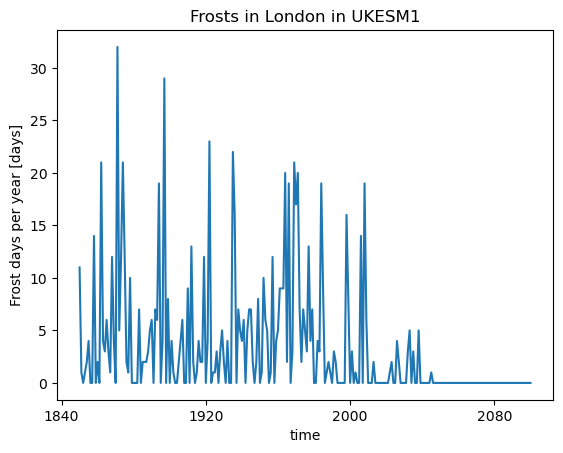

In [4]:
frost_days = xclim.indicators.atmos.frost_days(tasmin, freq='YS')
frost_days=frost_days.assign_attrs({'long_name': 'Frost days per year'})
frost_days.plot()
plt.title('Frosts in London in UKESM1')

Now let's compute some cold spell durations using the xclim standard index approach. We'll apply a window size of 3-days (rather than the default 6). We'll explore the impact of choice of baseline from which to measure the cold anomaly for each day of the year by using clmate normal periods at different points (standard WMO definition, the end of the century and the pre-industrial).

Text(0.5, 1.0, 'Full year cold spell days wrt 1961-90')

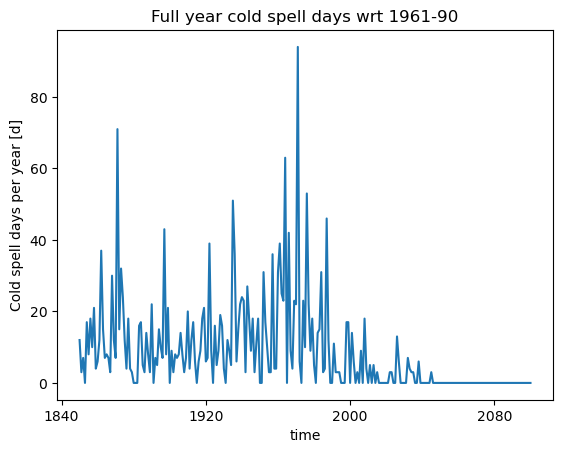

In [5]:
tasmin_1961_1990 = tasmin.loc['1961':'1990']
tn10_1961_1990 = xclim.core.calendar.percentile_doy(tasmin_1961_1990, per=10).sel(percentiles=10)
cold_spell_days=xclim.indices.cold_spell_duration_index(tasmin, tn10_1961_1990,window=3)
cold_spell_days=cold_spell_days.assign_attrs({'long_name': 'Cold spell days per year'})
cold_spell_days.plot()
plt.title('Full year cold spell days wrt 1961-90')

Text(0.5, 1.0, 'Full year cold spell days wrt 2071-2100')

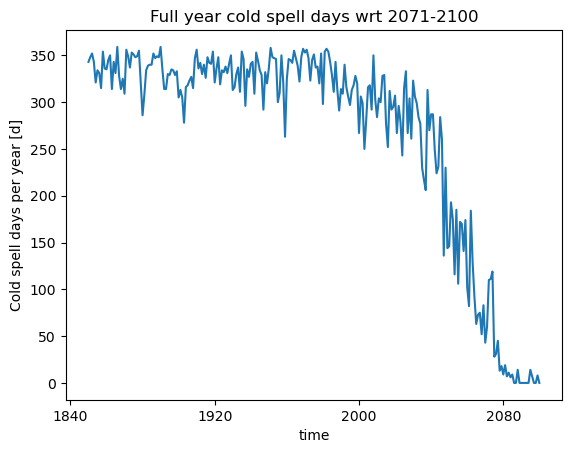

In [6]:
tasmin_end21st = tasmin.loc['2071':'2100']
tn10_end21st = xclim.core.calendar.percentile_doy(tasmin_end21st, per=10).sel(percentiles=10)
cold_spell_days=xclim.indices.cold_spell_duration_index(tasmin, tn10_end21st,window=3)
cold_spell_days=cold_spell_days.assign_attrs({'long_name': 'Cold spell days per year'})
cold_spell_days.plot()
plt.title('Full year cold spell days wrt 2071-2100')

Text(0.5, 1.0, 'Full year cold spell days wrt 1850-1900')

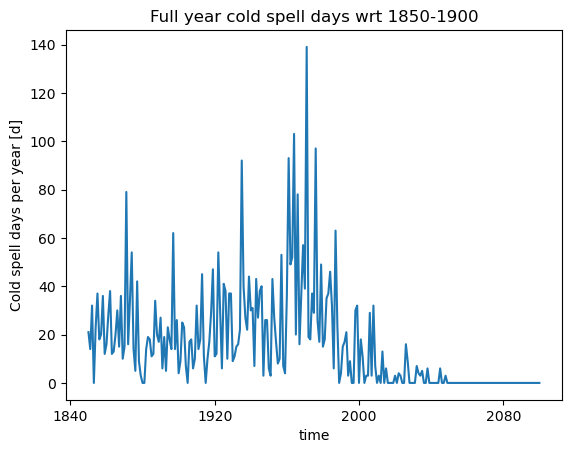

In [7]:
tasmin_preind = tasmin.loc['1850':'1900']
tn10_preind = xclim.core.calendar.percentile_doy(tasmin_preind, per=10).sel(percentiles=10)
cold_spell_days=xclim.indices.cold_spell_duration_index(tasmin, tn10_preind,window=3)
cold_spell_days=cold_spell_days.assign_attrs({'long_name': 'Cold spell days per year'})
cold_spell_days.plot()
plt.title('Full year cold spell days wrt 1850-1900')

It probably makes more sense to ignore any cold spells that happen in Summer. They may have some agricultural effects, but probably have little other impacts. So let's only look at DJF instead... 

Text(0.5, 1.0, 'Winter cold spell days wrt preindustrial')

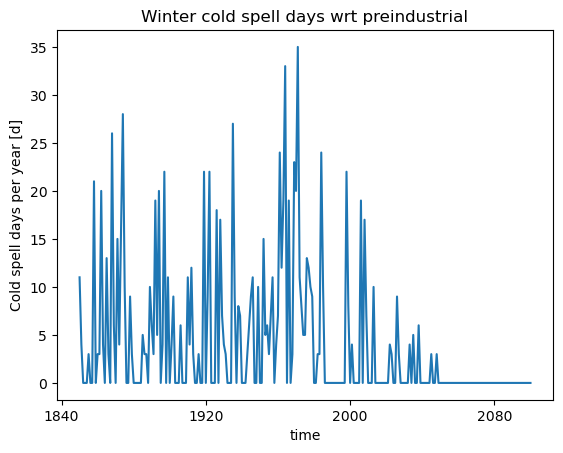

In [8]:
tasmin_djf = tasmin.sel(time=tasmin['time.month'].isin([12, 1, 2]))
DJF_dayofyears = np.arange(1, 91)
DJF_dayofyears[DJF_dayofyears > 60] += 270
tn10_preind_djf = tn10_preind.sel(dayofyear=tn10_preind['dayofyear'].isin(DJF_dayofyears))
cold_spell_days=xclim.indices.cold_spell_duration_index(tasmin_djf, tn10_preind_djf,window=3)
cold_spell_days=cold_spell_days.assign_attrs({'long_name': 'Cold spell days per year'})
cold_spell_days.plot()
plt.title('Winter cold spell days wrt preindustrial')

In [9]:
print('The average number of cold spell days between 1850-1900 is ', cold_spell_days.loc['1850':'1900'].mean().values, 'days, \n which fits with my expectations (i.e. less than 10%) \n but is not what the I take away from the looking at the plot!')

The average number of cold spell days between 1850-1900 is  6.137254901960785 days, 
 which fits with my expectations (i.e. less than 10%) 
 but is not what the I take away from the looking at the plot!
